In [155]:
# 필요한 라이브러리 임포트

import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 

In [156]:
# 전처리된 훈련 데이터 및 테스트 데이터 불러오기
train_df = pd.read_csv('preprocessing_DataFrame_train_cat.csv', index_col = 'Id')
test_df = pd.read_csv('preprocessing_DataFrame_test_cat.csv', index_col = 'Id')

In [157]:
# 모델링에 사용할 컬럼 정의
X_cols = ['Neighborhood', 'LotArea', 'MSSubClass', 'LotFrontage', 'MSZoning',
          'GarageCars', 'GarageArea', 'GarageFinish', 'FireplaceQu', 'GarageType', 
          'ExterQual', 'KitchenQual', 'BsmtQual', 'CentralAir', 'HeatingQC', 'GrLivArea', 
          'TotRmsAbvGrd', 'TotalBaths', 'TotalBsmtArea', 'BuildingQuality']
X_cols_cat = ['Neighborhood', 'MSSubClass', 'MSZoning', 'GarageFinish', 'FireplaceQu', 'GarageType', 
              'ExterQual', 'KitchenQual', 'BsmtQual', 'CentralAir', 'HeatingQC']

In [158]:
# CatBoost모델링 후 Feature Importance 계산
from catboost import Pool, CatBoostRegressor

X_train = train_df[X_cols]
y_train = train_df['SalePrice']
X_test = test_df[X_cols]

# Pool 설정
train_pool = Pool(data=X_train, label=y_train, cat_features = X_cols_cat)
test_pool = Pool(data=X_test, cat_features = X_cols_cat)

# specify the training parameters
model = CatBoostRegressor(loss_function='RMSE')

#train the model
model.fit(train_pool, plot=False)

Learning rate set to 0.043442
0:	learn: 0.9740088	total: 18ms	remaining: 18s
1:	learn: 0.9456866	total: 34.7ms	remaining: 17.3s
2:	learn: 0.9190300	total: 51.1ms	remaining: 17s
3:	learn: 0.8927705	total: 66.2ms	remaining: 16.5s
4:	learn: 0.8682637	total: 81.9ms	remaining: 16.3s
5:	learn: 0.8445652	total: 97.4ms	remaining: 16.1s
6:	learn: 0.8233365	total: 114ms	remaining: 16.1s
7:	learn: 0.8020448	total: 133ms	remaining: 16.6s
8:	learn: 0.7820252	total: 154ms	remaining: 17s
9:	learn: 0.7632077	total: 173ms	remaining: 17.1s
10:	learn: 0.7427298	total: 192ms	remaining: 17.3s
11:	learn: 0.7251600	total: 215ms	remaining: 17.7s
12:	learn: 0.7088120	total: 236ms	remaining: 17.9s
13:	learn: 0.6932523	total: 253ms	remaining: 17.8s
14:	learn: 0.6775652	total: 270ms	remaining: 17.7s
15:	learn: 0.6669405	total: 282ms	remaining: 17.3s
16:	learn: 0.6513101	total: 298ms	remaining: 17.3s
17:	learn: 0.6358225	total: 316ms	remaining: 17.2s
18:	learn: 0.6222780	total: 334ms	remaining: 17.2s
19:	learn: 0.

In [159]:
print(model.get_best_iteration())
print(model.get_best_score())

None
{'learn': {'RMSE': 0.15846304385696164}}


C:\Users\SSW\AppData\Local\Temp\ipykernel_28392\3026519623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='tab10')


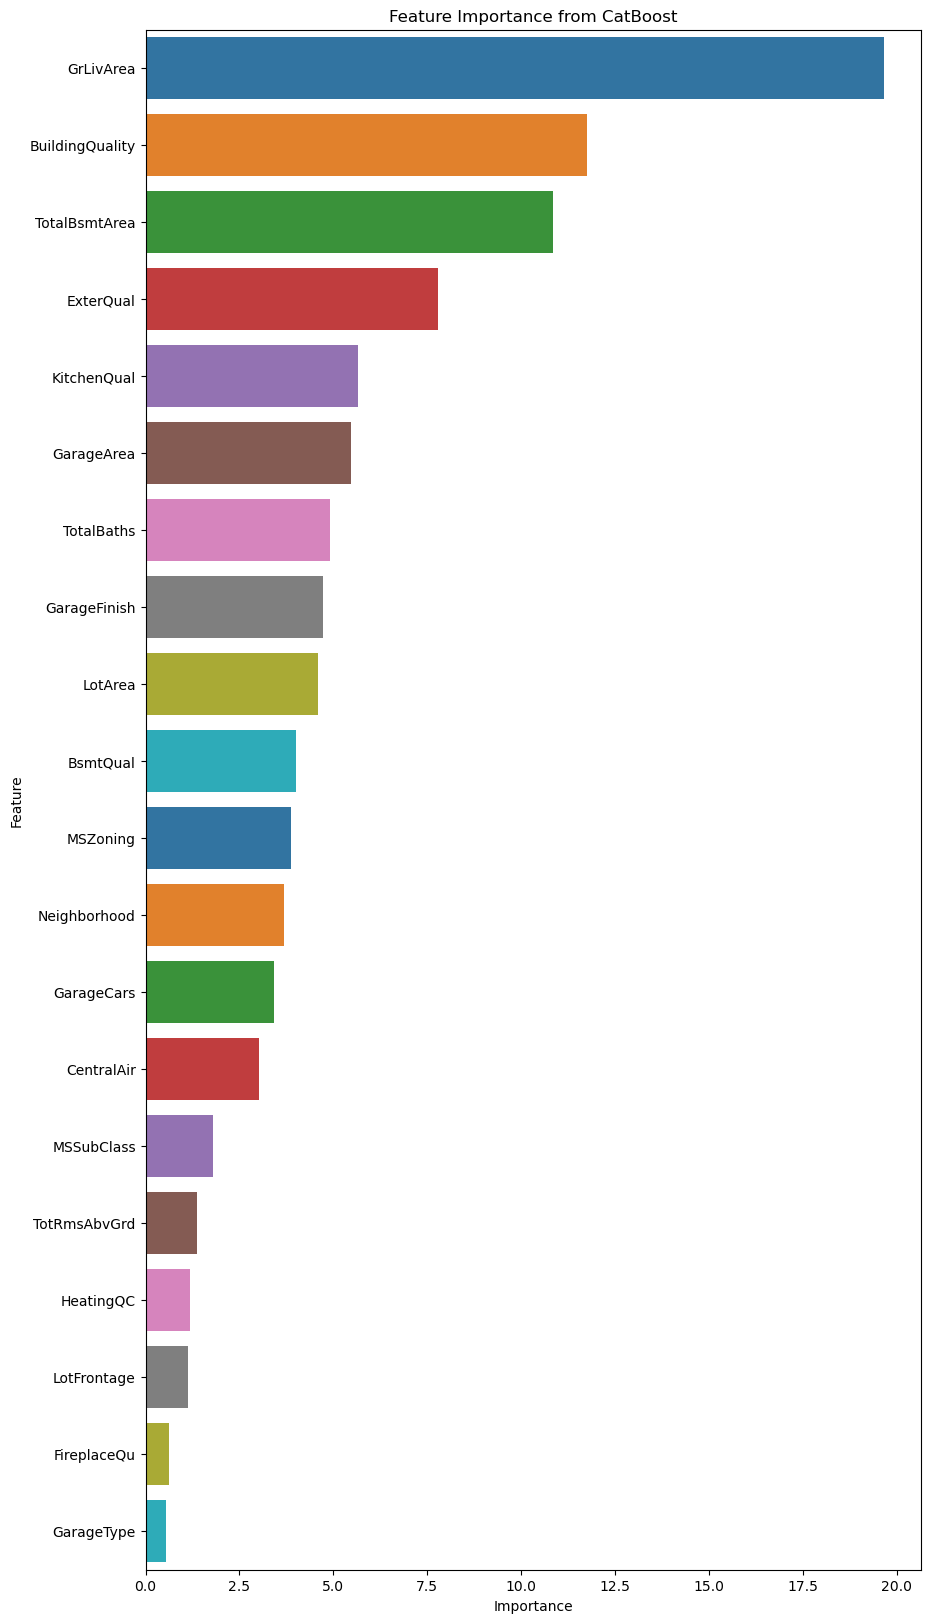

In [160]:
importances = model.get_feature_importance(train_pool)

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='tab10')
plt.title('Feature Importance from CatBoost')
plt.show()

In [161]:
# cross-validation 실행 및 결과

from catboost import cv

cv_result = cv(pool = train_pool, params = {'loss_function':'RMSE'}, logging_level = 'Verbose', fold_count=5, iterations = 1000, plot="True")
cv_result

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.9934274	test: 0.9320171	best: 0.9320171 (0)	total: 14.6ms	remaining: 14.6s
1:	learn: 0.9745251	test: 0.9157456	best: 0.9157456 (1)	total: 30.3ms	remaining: 15.1s
2:	learn: 0.9562173	test: 0.8988418	best: 0.8988418 (2)	total: 46.6ms	remaining: 15.5s
3:	learn: 0.9376212	test: 0.8809722	best: 0.8809722 (3)	total: 63.7ms	remaining: 15.9s
4:	learn: 0.9197326	test: 0.8640291	best: 0.8640291 (4)	total: 80.2ms	remaining: 16s
5:	learn: 0.9023085	test: 0.8489436	best: 0.8489436 (5)	total: 95.4ms	remaining: 15.8s
6:	learn: 0.8845201	test: 0.8321440	best: 0.8321440 (6)	total: 111ms	remaining: 15.7s
7:	learn: 0.8690689	test: 0.8178300	best: 0.8178300 (7)	total: 127ms	remaining: 15.7s
8:	learn: 0.8528342	test: 0.8026307	best: 0.8026307 (8)	total: 144ms	remaining: 15.8s
9:	learn: 0.8369751	test: 0.7887436	best: 0.7887436 (9)	total: 161ms	remaining: 16s
10:	learn: 0.8226126	test: 0.7763152	best: 0.7763152 (10)	total: 177ms	remaining: 15.9s
11:	learn: 0.8077481	test: 

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,0,0.981129,0.041514,0.980958,0.010587
1,1,0.962698,0.040186,0.961815,0.010996
2,2,0.944548,0.039518,0.943354,0.011119
3,3,0.926737,0.040006,0.925684,0.010317
4,4,0.909679,0.039701,0.908600,0.010152
...,...,...,...,...,...
995,995,0.328781,0.038018,0.177792,0.002739
996,996,0.328788,0.038016,0.177730,0.002744
997,997,0.328802,0.038048,0.177619,0.002713
998,998,0.328777,0.038045,0.177506,0.002734


In [162]:
best_iteration = cv_result['test-RMSE-mean'].idxmin()  # RMSE가 가장 낮은 iteration 선택
print(f"최적 iteration: {best_iteration}")
print(f"최적 Test RMSE: {cv_result.loc[best_iteration, 'test-RMSE-mean']}")

최적 iteration: 998
최적 Test RMSE: 0.32877702043308427


In [163]:
preds = model.predict(test_pool)
print(preds)

[-0.89799178 -0.07046285  0.25802317 ...  0.10991295 -0.8701095
  0.52174995]


In [164]:
# 아래는 예측값(preds) 역변환에 필요한 람다값 및 코드

# Yeo-Johnson 변환에 활용된 람다값
lambda_ = -0.044048042422657335

# 정규화에 활용된 SalePrice의 평균 및 표준편차
SalePrice_mean = 9.3309226951343
SalePrice_std = 0.23274601184129493

# 정규화를 먼저 역변환
preds = preds * SalePrice_std
preds = preds + SalePrice_mean

In [177]:
# Yeo-Johnson 변환을 역변환
# 역변환 함수 정의
def inverse_yeojohnson(y, lambda_):
    # y가 NumPy 배열인 경우를 대비
    y = np.asarray(y)

    # 각 요소에 대해 역변환 수행
    for i in range(len(y)):
        if y[i] >= 0 and lambda_ == 0:
            y[i] = exp(y[i]) - 1
        elif y[i] >= 0 and lambda_ != 0:
            y[i] = (y[i] * lambda_ + 1) ** (1 / lambda_) - 1
        elif y[i] < 0 and lambda_ != 2:
            y[i] = 1 - (-(2 - lambda_) * y[i] + 1) ** (1 / (2 - lambda_))
        elif y[i] < 0 and lambda_ == 2:
            y[i] = 1 - exp(-y[i])
    
    return y  # 수정된 결과 반환

# 예측값(preds)에 대해 역변환 수행
preds = inverse_yeojohnson(preds, lambda_)

In [179]:
output_df = pd.DataFrame({'Id': test_df.index,
                       'SalePrice': preds.squeeze()})

output_df.head()

,Id,SalePrice
0,1461,116461.152452
1,1462,161070.030378
2,1463,183434.430752
3,1464,182957.848774
4,1465,190669.476343


In [181]:
output_df.to_csv('output_cat.csv', index=False)